# Introduction to data

Statistics is the study of how best to collect, analyze and draw conclusions from data following a general process of investigation :
    1. Identify a question or problem
    2. Collect relevant data on topic
    3. Analyze the data
    4. Form a conslusion

Statistics should answer 3 primary questions :
    * how best we collect data ?
    * how should it be analyzed ?
    * What can we infer from the analysis ?

 ## 1.1 Case Study : using stents to prevent strokes 

**Generating a table of observations for trreatment and control group of a stent efficiency study**

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 20 # control the number of rows printed

Creating 2 distinct groups respecting the amount of observations given in the book : 

In [2]:
#Creating the treatment group
treatment = pd.DataFrame(columns=['group','thirty_days','365days'])
treatment['group'] =  ['treatment']*224
treatment['thirty_days'] = (['no event']*191)  +  (['stroke']*33)
treatment['365days'] = (['no event']*179) + (['stroke'] * 45)
treatment

,group,thirty_days,365days
0,treatment,no event,no event
1,treatment,no event,no event
2,treatment,no event,no event
3,treatment,no event,no event
4,treatment,no event,no event
5,treatment,no event,no event
6,treatment,no event,no event
7,treatment,no event,no event
8,treatment,no event,no event
9,treatment,no event,no event


In [3]:
#creating the control group
control = pd.DataFrame(columns=['group','thirty_days','365days'])
control['group'] = ['control']*227
control['thirty_days'] = (['no event']*214)+(['stroke']*13)
control['365days'] = (['no event'] * 199)+(['stroke']*28)
control

,group,thirty_days,365days
0,control,no event,no event
1,control,no event,no event
2,control,no event,no event
3,control,no event,no event
4,control,no event,no event
5,control,no event,no event
6,control,no event,no event
7,control,no event,no event
8,control,no event,no event
9,control,no event,no event


Merge the 2 Datraframes to produce the same table as the example :

In [4]:
frames = [treatment,control]
patients = pd.concat(frames,ignore_index=True)
patients

,group,thirty_days,365days
0,treatment,no event,no event
1,treatment,no event,no event
2,treatment,no event,no event
3,treatment,no event,no event
4,treatment,no event,no event
5,treatment,no event,no event
6,treatment,no event,no event
7,treatment,no event,no event
8,treatment,no event,no event
9,treatment,no event,no event


Shuffling The rows 

In [5]:
patients = patients.sample(frac=1).reset_index(drop=True)

In [6]:
patients

,group,thirty_days,365days
0,control,no event,no event
1,control,no event,no event
2,treatment,stroke,stroke
3,treatment,no event,no event
4,control,no event,stroke
5,control,no event,no event
6,control,no event,no event
7,control,no event,no event
8,control,no event,no event
9,treatment,no event,no event


** Summary Statistics : ** summarizing a large amount of data with a single number  like 
* The proportion of people who had a stroke in the treatment group : 45/224 = 20%
helps getting a first insight information.

<br/>
Still caution is important, many parameters should be taken into account and hastly inference could be misleading.

## 1.2 Data Basics 

Each **row** of the matrice represents a **case**. And each column a **variable**

Types of variables

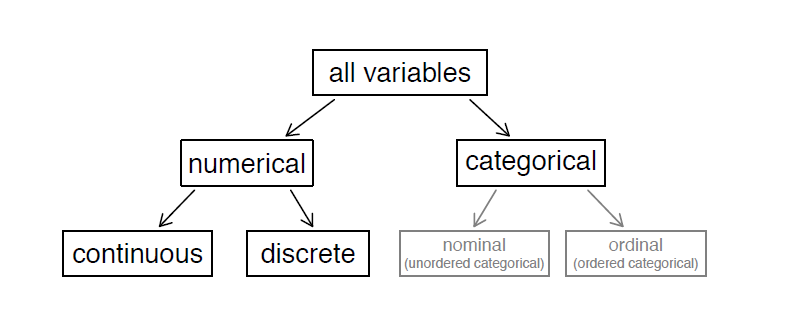

In [7]:
from IPython.display import Image
Image(filename="data_types.png")

## 1.3 Overview of data collection principles

**Population :** the target of a statistical analysis.

** Sample : ** being too expensive to collect an exhaustivity of data in  a population, we tend take a small fraction of the population. This can be done by raffles, even thou there is always a risk to take biased data.

**Anecdotal evidence : ** data collected in a haphazard fashion, that may only represents extraordinary cases.

It's important to avoid commn traps when collecting and interpreting data :
* **non-reponse : ** a big non response rate makes it hard to get a clear answer 
* **convenience sample : ** elements easily found in gathering data (close neighborhood for instance) generates a big bias

** Explanatory and response variables : ** if we suspect a data **X** to affect another **Y**. Then we can call X the **explanatory variable** and Y the **response variable**.
<br/>
Ex : poverty(explanatory) affecting federal spending(response) in a county.

## 1.4 Observational Studies and sampling strategies

** Prospective study : ** indentifies individuals and collects information as events unfold

** Retrospective studies : ** collect data after events have taken place

** Sampling methods **:
*  **Simple Random sampling : ** Simple raffle like paper in a bucket
*  **Stratified sampling    : ** divide the population in stratas of identical attributes
*  **Cluster sample         : **      
*  **Multistage Sampe       : **

## 1.5 Experiments : 

Principles of experiment design : 
* **Controlling :** control differences in an experiment (control group)
* **Randomization :** randomizing pateints into treatment group
* **Replication :** the more cases researchers observe, the more accurately they can estimate the effect
* **Blocking :** grouping individuals into specific blocks

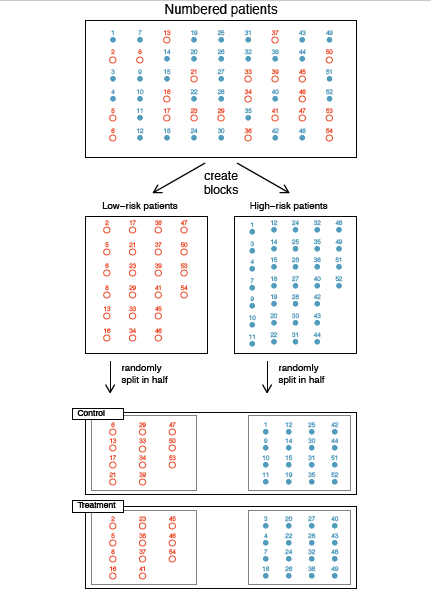

In [8]:
from IPython.display import Image
Image(filename="blocking.png")

## 1.6 Examining Numerical Data

using the **email50** dataset : 

In [9]:
#importing plotting libs
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
e50 = pd.read_csv('Dataset/email50.csv')
e50.head()

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,1,2012-01-04 05:19:16,0,0,0,no,...,0,0,21.705,551,1,1,0,0,8,small
1,0,0,1,0,0,2012-02-16 12:10:06,0,0,0,no,...,0,0,7.011,183,1,0,0,0,1,big
2,1,0,1,4,0,2012-01-04 07:36:23,0,2,0,no,...,0,0,0.631,28,0,0,0,0,2,none
3,0,0,1,0,0,2012-01-04 09:49:52,0,0,0,no,...,0,0,2.454,61,0,0,0,0,1,small
4,0,0,1,0,0,2012-01-27 01:34:45,0,0,9,no,...,0,1,41.623,1088,1,0,0,0,43,small


### 1.6.1 Scatterplot

Scatterplot offers a case-by-case view of data for 2 numerical variables

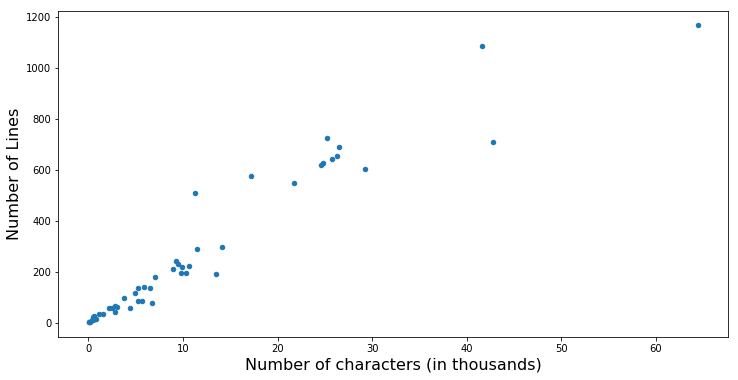

In [11]:
e50.plot.scatter(figsize=(12,6),x='num_char',y='line_breaks')
plt.xlabel("Number of characters (in thousands)",fontsize=16)
plt.ylabel('Number of Lines',fontsize=16)

## The mean 

Sometimes called the average, is a common way to to measure the center of the distribution. 

Mean of the number of characters in a mail : 

In [13]:
e50['num_char'].mean()

11.511877551020408

* The sample **mean** is usualy refered to as $\bar{X}$

**rule : **
<br/>
$\bar{X}$ =  $\frac{1}{n}$  ($\displaystyle\sum_{i=1}^{n} x_i$) = $\frac{x_1+x_2+\dots+x_n}{n}$

* The population mean is refered to as $\mu$

## 1.6.2 Histograms

Histograms provide a view of the **data density**

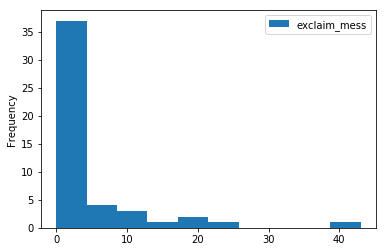

In [24]:
e50.plot.hist(x='num_char',y='exclaim_mess')

In [36]:
ar = np.linspace(0, 65, 13, endpoint=False)

In [39]:
ar = ar.astype(int)
ar

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])

In [42]:
x = pd.cut(e50['num_char'],bins=ar)

In [43]:
x.value_counts()

(0, 5]      19
(5, 10]     12
(10, 15]     6
(25, 30]     5
(20, 25]     3
(40, 45]     2
(15, 20]     1
(55, 60]     0
(50, 55]     0
(45, 50]     0
(35, 40]     0
(30, 35]     0
Name: num_char, dtype: int64

In [45]:
freq = x.value_counts()

In [51]:
freq.index

CategoricalIndex([  (0, 5],  (5, 10], (10, 15], (25, 30], (20, 25], (40, 45],
                  (15, 20], (55, 60], (50, 55], (45, 50], (35, 40], (30, 35]],
                 categories=[(0, 5], (5, 10], (10, 15], (15, 20], (20, 25], (25, 30], (30, 35], (35, 40], ...], ordered=True, dtype='category')

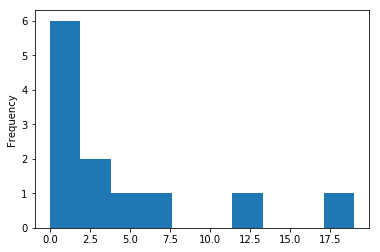

In [50]:
freq.plot.hist(x=freq.index)

In [55]:
f = pd.Series(freq.index.values, index=freq )

In [57]:
f

num_char
19      (0, 5]
12     (5, 10]
6     (10, 15]
5     (25, 30]
3     (20, 25]
2     (40, 45]
1     (15, 20]
0     (55, 60]
0     (50, 55]
0     (45, 50]
0     (35, 40]
0     (30, 35]
dtype: category
Categories (12, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (40, 45] < (45, 50] < (50, 55] < (55, 60]]